# Fraud detection with Neural Networks

We are going to solve this problem using NN

In [2]:
#importing the libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading data and preprocessing

In [3]:
df_data = pd.read_csv('creditcard.csv',delimiter=',')

We will not use the attribute time in this model, although we are dropping relevant information. This shouldn't be done in a real context without justified it

In [4]:
df = df_data.drop(['Time'], axis=1)

In [5]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We have to normalize amount

In [6]:
from sklearn.preprocessing import MinMaxScaler

Let's extract the amounts values and scaled them using sklearn MinMaxScaler. (It exists other ways but we decide this for comodity)

In [7]:
amount = df['Amount'].values
amount = amount.reshape(-1,1)

mms = MinMaxScaler()
amount_scaled = mms.fit_transform(amount)

Replacing amount column with the normalize version

In [8]:
df['Amount']=amount_scaled
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0


## Proportions

In [9]:
from collections import Counter

Let's see Class 0s and 1s

In [10]:
proportions = Counter(df['Class'])
print('Original dataset shape {}'.format(proportions))

Original dataset shape Counter({0: 284315, 1: 492})


In a plot

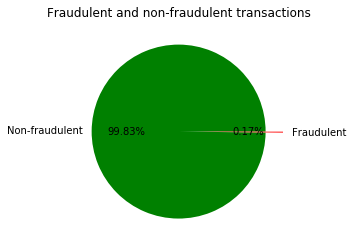

In [11]:
values = proportions.values()
colors = ['g', 'r']
explode = [0, 0.2]
labels = ['Non-fraudulent', 'Fraudulent']
plt.pie(values, colors= colors, labels=labels, explode = explode, autopct='%.2f%%')
plt.title('Fraudulent and non-fraudulent transactions')
plt.show()

Only 0,17% of the data correspond to fraudulent transactions! The dataset is clearly imbalanced, so it is needed a resampling technique

## Train Test Split

Before using an resampling method let's separate the data in train and test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
features = list(df.columns[:-1]) #features names

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Class'], test_size=0.2)

Proportions

In [14]:
train_proportions, test_proportions = Counter(y_train), Counter(y_test)
print('Train {}'.format(train_proportions))
print('Test {}'.format(test_proportions))

Train Counter({0: 227450, 1: 395})
Test Counter({0: 56865, 1: 97})


## Train set before resampling

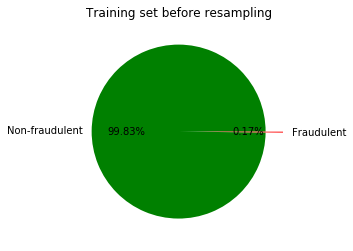

In [15]:
values = train_proportions.values()
colors = ['g', 'r']
explode = [0, 0.2]
labels = ['Non-fraudulent', 'Fraudulent']
plt.pie(values, colors= colors, labels=labels, explode = explode, autopct='%.2f%%')
plt.title('Training set before resampling')
plt.show()

## Resampling

We are going to use a technique that combines an oversampling technique with an undersampling technique. We select SMOTE with Edited Nearest Neighbouf

In [18]:
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

Using TensorFlow backend.


In [19]:
enn = EditedNearestNeighbours(sampling_strategy='majority',n_neighbors=25)
smoteenn = SMOTEENN(enn=enn)

X_rs,y_rs = smoteenn.fit_sample(X_train,y_train)

print('Sampler results {}'.format(Counter(y_rs)))

Sampler results Counter({1: 227450, 0: 224801})


## Train set after resampling

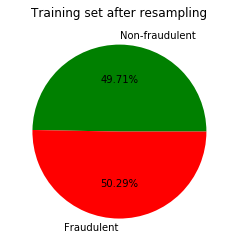

In [20]:
values = Counter(y_rs).values()
colors = ['g', 'r']
explode = [0, 0]
labels = ['Non-fraudulent', 'Fraudulent']
plt.pie(values, colors= colors, labels=labels, explode = explode, autopct='%.2f%%')
plt.title('Training set after resampling')
plt.show()

## Training the model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV

clf_lr = LogisticRegression(max_iter=100)

cv = KFold(n_splits=5, shuffle=True)

grid_lr = {'solver':['saga','liblinear','warn'],
           #'penalty':['l1','l2'],
           'class_weight':[{0:1,1:1.3},'balanced']}

clf_lr = GridSearchCV(clf_lr, grid_lr , cv=cv) 
clf_lr = clf_lr.fit(X_rs, y_rs)

clf_lr.estimator

#### Neural Network

In [18]:
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers import Activation, Dropout, Flatten, Dense

In [19]:
model = Sequential()

n_cols = X_rs.shape[1] #number of columns

model.add(Dense(256, activation='relu', input_shape=(n_cols,)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

opt=optimizers.SGD(lr=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

In [20]:
model.fit(X_rs, y_rs, validation_split=0.2, epochs=8, class_weight={0:1,1:3})

Train on 361776 samples, validate on 90444 samples
Epoch 1/8
361776/361776 [==============================] - 52s 143us/step - loss: 0.0672 - acc: 0.9848 - val_loss: 0.0074 - val_acc: 1.0000
Epoch 2/8
361776/361776 [==============================] - 47s 130us/step - loss: 0.0128 - acc: 0.9969 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 3/8
361776/361776 [==============================] - 49s 136us/step - loss: 0.0066 - acc: 0.9985 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 4/8
361776/361776 [==============================] - 50s 137us/step - loss: 0.0047 - acc: 0.9989 - val_loss: 6.6141e-04 - val_acc: 1.0000
Epoch 5/8
361776/361776 [==============================] - 50s 137us/step - loss: 0.0032 - acc: 0.9993 - val_loss: 6.6969e-04 - val_acc: 1.0000
Epoch 6/8
361776/361776 [==============================] - 49s 136us/step - loss: 0.0038 - acc: 0.9992 - val_loss: 2.4010e-04 - val_acc: 1.0000
Epoch 7/8
361776/361776 [==============================] - 51s 142us/step - loss: 0.0020 - acc: 0

In [28]:
y_pred_nn = model.predict_classes(X_test)

## Results

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
print('\nNeural Network \n',  confusion_matrix(y_test, y_pred_nn, labels = [0,1]))


Neural Network 
 [[56751   113]
 [   13    85]]


In [30]:
target_names = ['Non-fraudulent','Fraudulent']
print('\n\tNeural Network\n',classification_report(y_test, y_pred_nn, target_names=target_names))


	Neural Network
                 precision    recall  f1-score   support

Non-fraudulent       1.00      1.00      1.00     56864
    Fraudulent       0.43      0.87      0.57        98

     micro avg       1.00      1.00      1.00     56962
     macro avg       0.71      0.93      0.79     56962
  weighted avg       1.00      1.00      1.00     56962

